# DATA CLEANING AND FEATURE ENGINEERING 


In [57]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
df=pd.read_csv('D:\\Development\\API_WEBSCRAPPING\\API_Web\\movies_analytics_project\\data\\raw\\imdb_top_250_movies.csv')
df.head()

,Movie_title,Year,Ratings,Runtime,Age_limit,Votes
0,1. The Shawshank Redemption,1994,9.3,2h 22m,R,(3.1M)
1,2. The Godfather,1972,9.2,2h 55m,R,(2.2M)
2,3. The Dark Knight,2008,9.1,2h 32m,PG-13,(3.1M)
3,4. The Godfather Part II,1974,9.0,3h 22m,R,(1.5M)
4,5. 12 Angry Men,1957,9.0,1h 36m,Approved,(948K)


In [58]:
df.info()
df['Age_limit']=df['Age_limit'].fillna(df['Age_limit'].mode()[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_title  250 non-null    object 
 1   Year         250 non-null    int64  
 2   Ratings      250 non-null    float64
 3   Runtime      250 non-null    object 
 4   Age_limit    245 non-null    object 
 5   Votes        250 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_title  250 non-null    object 
 1   Year         250 non-null    int64  
 2   Ratings      250 non-null    float64
 3   Runtime      250 non-null    object 
 4   Age_limit    250 non-null    object 
 5   Votes        250 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [60]:
df['Votes']=df['Votes'].str.replace(')','').str.replace('(','').str.replace('K','000').str.replace('M','000000')
df['Votes'].head()
df['Votes']=pd.to_numeric(df['Votes'])
df['Votes'].dtype #float 


dtype('float64')

In [61]:
df[['Hours', 'Minutes']] = df['Runtime'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')
df['Hours']=df['Hours'].fillna(df['Hours'].mode()[0]).astype('float')
df['Minutes']=df['Minutes'].fillna(df['Minutes'].mode()[0])
df['duration']=df['Hours']*60+pd.to_numeric(df['Minutes'])
df['duration'].head()

#droping hours and minutes column
df.drop(columns=['Hours','Minutes','Runtime'],inplace=True )

In [62]:
df['Age_limit'].unique()
df['Age_limit']=df['Age_limit'].map({ 'G':0,'PG-13':13,'PG':10,'R':17,'NC-17':18,'TV-MA':19,'Approved':5,'Passed':1,'Not Rated':0})

In [63]:
df.describe()

,Year,Ratings,Age_limit,Votes,duration
count,250.000000,250.000000,250.00000,250.000000,250.000000
mean,1988.532000,8.308400,11.17600,338396.404000,132.388000
std,25.375592,0.232088,6.47462,326115.751989,35.477317
min,1921.000000,8.000000,0.00000,1.100000,68.000000
25%,1973.000000,8.100000,5.00000,2.800000,109.250000
50%,1995.000000,8.200000,13.00000,234000.000000,129.000000
75%,2009.000000,8.400000,17.00000,593250.000000,148.000000
max,2024.000000,9.300000,19.00000,1000000.000000,374.000000


# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

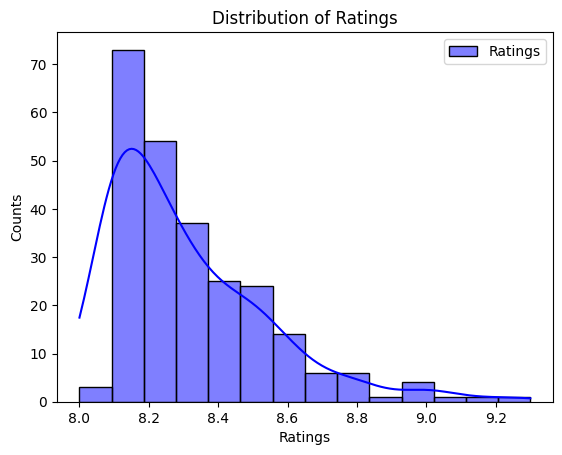

In [64]:
#Unvivariate Analysis
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Counts")
sns.histplot(data=df,x=df['Ratings'],kde=True,label='Ratings',color='blue')
plt.legend()
plt.show()

### INSIGTHS
### 1. Movies with Rating 8-8.2 has Highest Counts
### 2.Movies with Rating  8.8-9.2 has Lowest Counts
### 3. Rest is between 

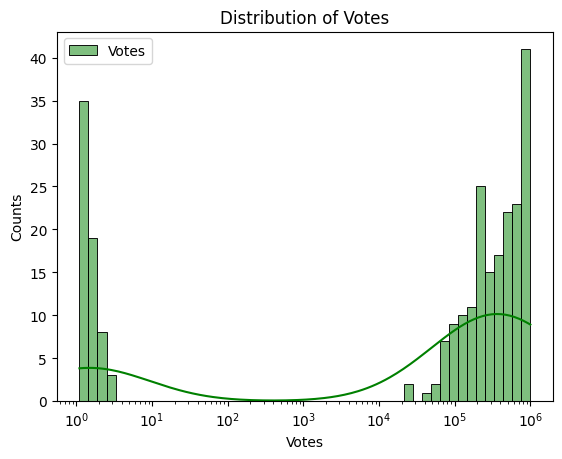

In [65]:
#votes distribution
sns.histplot(data=df,x=df['Votes'],kde=True,label='Votes',color='green',log_scale=True,bins=50)
# sns.despine()
plt.title("Distribution of Votes")
plt.xlabel("Votes")     
plt.ylabel("Counts")
plt.legend()
plt.show()

### INSIGHTS
### 1. Maximum votes has hightest Counts upto 40 
### 2.Least votes has counts upto 35
### 3.Remaining falls between in this range

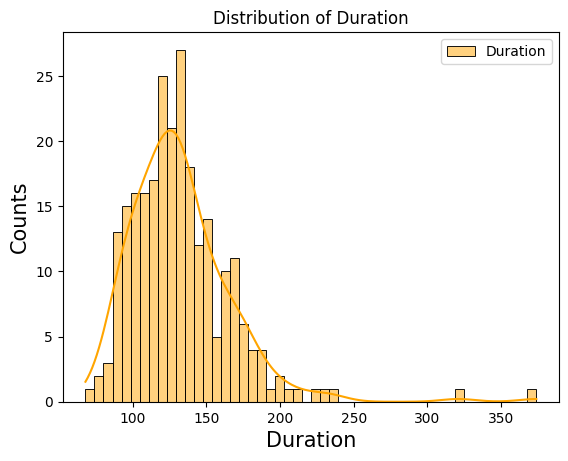

In [70]:
sns.histplot(data=df,x=df['duration'],kde=True,label='Duration',color='orange',bins=50)
# plt.figure(figsize=(16,8))
plt.title("Distribution of Duration")
plt.xlabel("Duration",fontsize=15)  
plt.ylabel("Counts",fontsize=15)
plt.legend() 
plt.show()


C:\Users\vernon\AppData\Local\Temp\ipykernel_24680\1781271695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_limit', data=df, palette='mako')


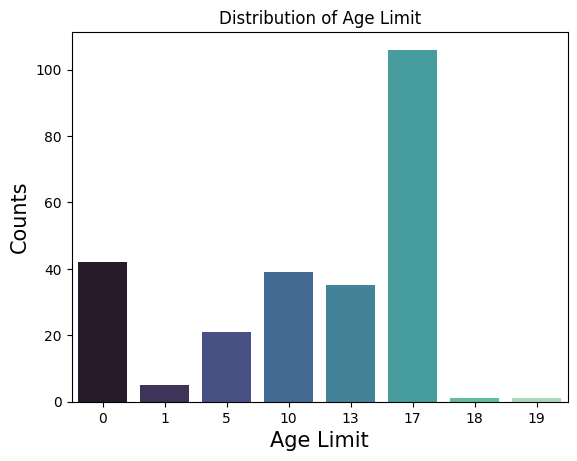

In [82]:
sns.countplot(x='Age_limit', data=df, palette='mako')
plt.title("Distribution of Age Limit")
plt.xlabel("Age Limit", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.show()


### INSIGHTS
### 1. For age 17+ it has the highest count
### 2. For age 18+ it has the lowest count 

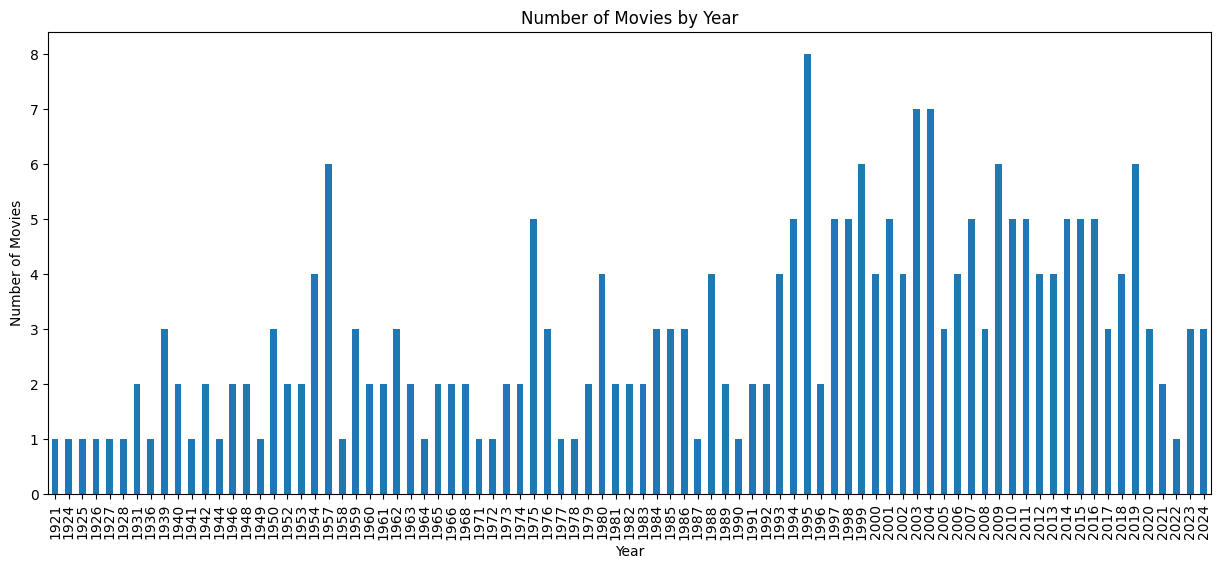

In [85]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Year")
plt.show()


## BIVARIATE ANALYSIS

<Figure size 1600x800 with 0 Axes>

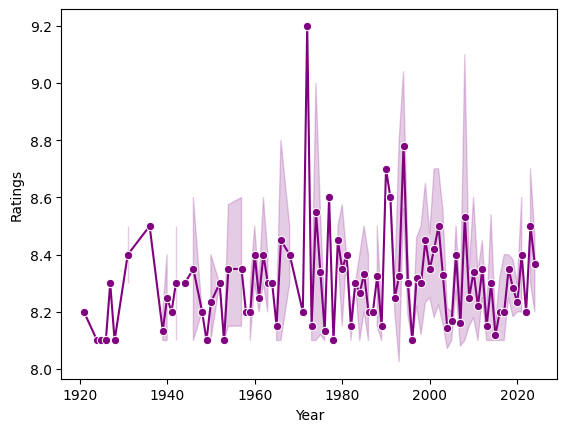

<Figure size 1600x800 with 0 Axes>

In [87]:
sns.lineplot(data=df,x='Year',y='Ratings',marker='o',color='purple')
plt.figure(figsize=(16,8))

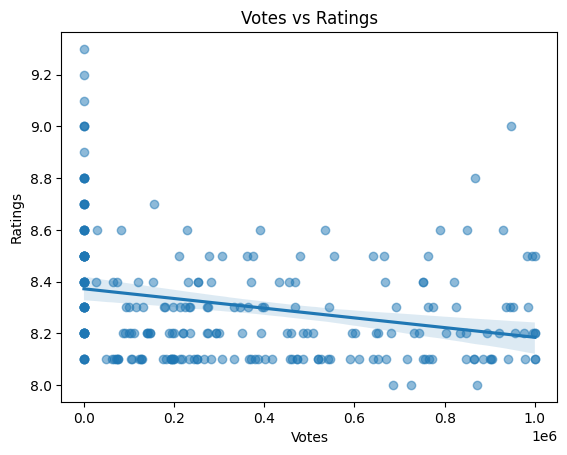

In [90]:
sns.regplot(data=df, x='Votes', y='Ratings', scatter_kws={'alpha':0.5})
plt.title("Votes vs Ratings")
plt.show()


### MULTIVARIATE ANALYSIS

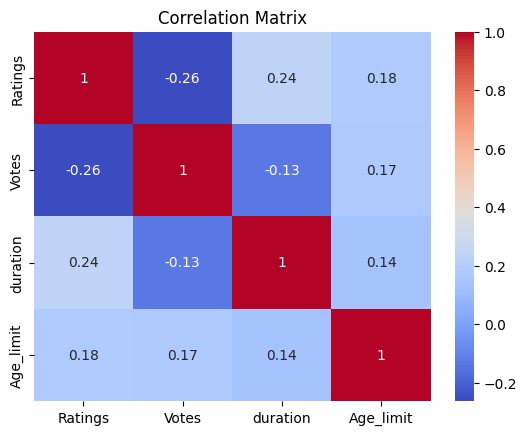

In [ ]:
corr = df[['Ratings ','Votes','duration','Age_limit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


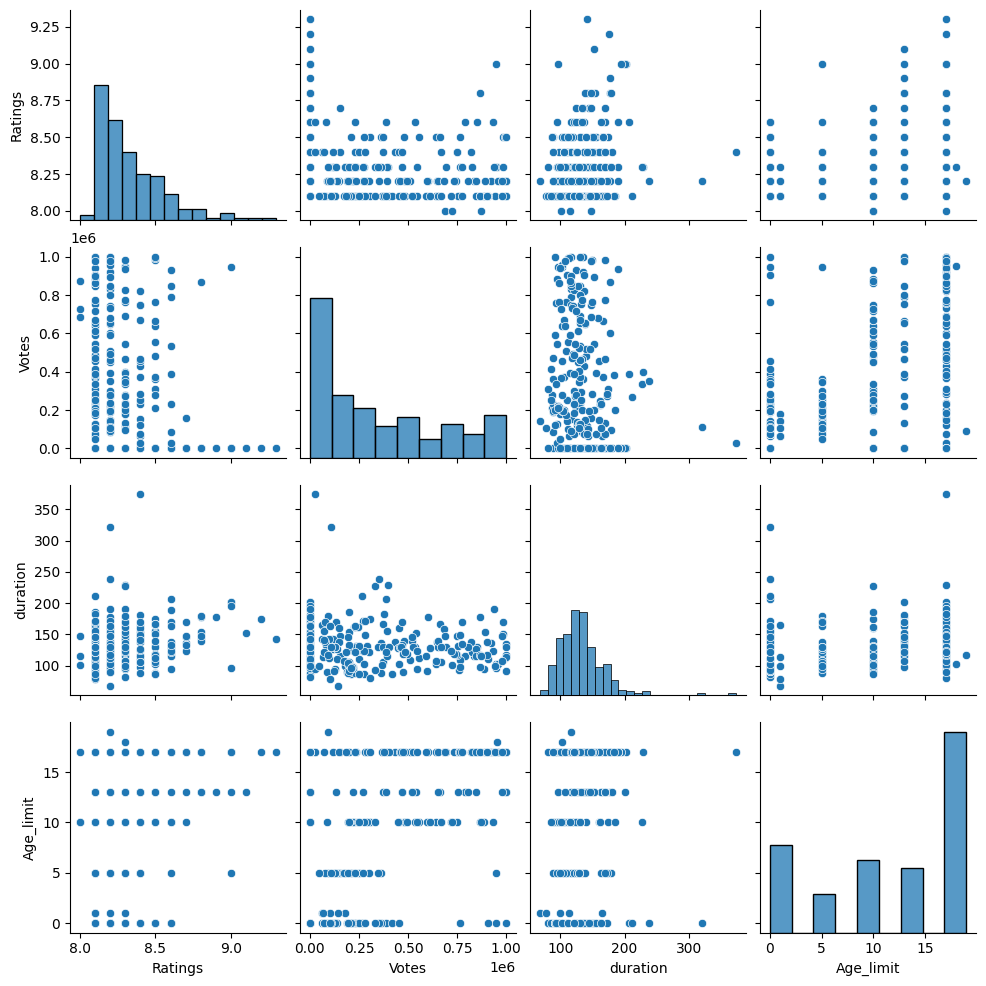

In [95]:
sns.pairplot(df[['Ratings','Votes','duration','Age_limit']])
plt.show()


In [67]:
df.head()

,Movie_title,Year,Ratings,Age_limit,Votes,duration
0,1. The Shawshank Redemption,1994,9.3,17,3.1,142.0
1,2. The Godfather,1972,9.2,17,2.2,175.0
2,3. The Dark Knight,2008,9.1,13,3.1,152.0
3,4. The Godfather Part II,1974,9.0,17,1.5,202.0
4,5. 12 Angry Men,1957,9.0,5,948000.0,96.0


In [96]:
df.to_csv('cleaned_imdb_top_250_movies.csv', index=False)